# ***Libraries***

In [11]:
import pandas as pd
import numpy as np
import networkx as nx
import json

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import umap.umap_ as umap
from sklearn.manifold import TSNE

# ***Loading the Network***

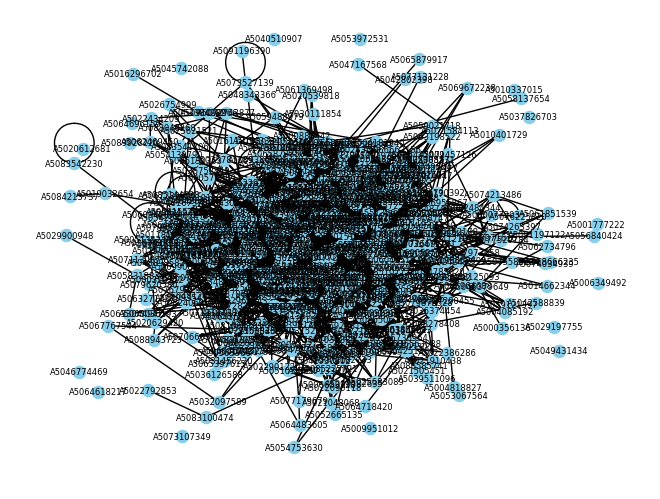

In [12]:
G = nx.read_graphml('/media/work/icarovasconcelos/mono/ppg_graph.graphml')

nx.draw(G, with_labels=True, node_color='skyblue', node_size=75, edge_cmap=plt.cm.Blues, pos=nx.spring_layout(G, k=0.35), font_size=6)

# Show the plot
plt.show()

# ***Loading the Works Data***

In [13]:
df = pd.read_csv('/media/work/icarovasconcelos/mono/data/7&6ppg_works_since_2004.csv')
df.head()

,work_id,work_title,work_display_name,work_publication_year,work_publication_date,author_id,author_name,author_position,institution_id,institution_name,institution_country_code,topic_name
0,W1984712701,Performance Evaluation of Container-Based Virt...,Performance Evaluation of Container-Based Virt...,2013,2013-02-01,A5065379079,Miguel G. Xavier,first,I45643870,Pontifícia Universidade Católica do Rio Grande...,BR,Cloud Computing and Big Data Technologies
1,W1984712701,Performance Evaluation of Container-Based Virt...,Performance Evaluation of Container-Based Virt...,2013,2013-02-01,A5062060864,Marcelo Veiga Neves,middle,I45643870,Pontifícia Universidade Católica do Rio Grande...,BR,Cloud Computing and Big Data Technologies
2,W1984712701,Performance Evaluation of Container-Based Virt...,Performance Evaluation of Container-Based Virt...,2013,2013-02-01,A5075787478,Fábio Diniz Rossi,middle,I45643870,Pontifícia Universidade Católica do Rio Grande...,BR,Cloud Computing and Big Data Technologies
3,W1984712701,Performance Evaluation of Container-Based Virt...,Performance Evaluation of Container-Based Virt...,2013,2013-02-01,A5009859711,Tiago Ferreto,middle,I45643870,Pontifícia Universidade Católica do Rio Grande...,BR,Cloud Computing and Big Data Technologies
4,W1984712701,Performance Evaluation of Container-Based Virt...,Performance Evaluation of Container-Based Virt...,2013,2013-02-01,A5018576433,Timoteo Alberto Peters Lange,middle,I45643870,Pontifícia Universidade Católica do Rio Grande...,BR,Cloud Computing and Big Data Technologies


In [14]:
df_unique = df.drop_duplicates(subset=['work_id'])
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68578 entries, 0 to 499831
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   work_id                   68578 non-null  object
 1   work_title                68534 non-null  object
 2   work_display_name         68534 non-null  object
 3   work_publication_year     68578 non-null  int64 
 4   work_publication_date     68578 non-null  object
 5   author_id                 68578 non-null  object
 6   author_name               68578 non-null  object
 7   author_position           68578 non-null  object
 8   institution_id            68578 non-null  object
 9   institution_name          68578 non-null  object
 10  institution_country_code  68565 non-null  object
 11  topic_name                67630 non-null  object
dtypes: int64(1), object(11)
memory usage: 6.8+ MB


# ***Building a Color Map for the Topics***

- This Python script is working with a DataFrame `df_unique` and specifically with the column `topic_name`. The goal is to create a color map for the 20 most common topics in the DataFrame.

- The script starts by calling the `value_counts()` function on the `topic_name` column of the DataFrame. This function returns a Series containing counts of unique values in descending order, so that the first element is the most frequently-occurring element. The `head(20)` function is then called on the result to get the 20 most common values.

- These 20 most common values are then converted to a list using the `tolist()` function and stored in the variable `topics`.

- Next, the script creates a dictionary `color_map` where each key is a unique value from `topics` and each value is a randomly generated color. The color is generated using the `np.random.rand(3,)` function, which returns a 3-element array of random floats in the range [0, 1). This array represents a color in RGB format. The `mcolors.to_hex()` function is then called on this array to convert the RGB color to a hexadecimal string.

- Finally, the script prints the `color_map` dictionary. This dictionary can be used to assign a unique color to each of the 20 most common topics when visualizing the data.

In [15]:
most_common_values = df_unique['topic_name'].value_counts().head(20)

topics = most_common_values.index.tolist()

# Create a dictionary that maps each unique value to a random color
color_map = {value: mcolors.to_hex(np.random.rand(3,)) for value in topics}

print(color_map)


{'Empirical Studies in Software Engineering': '#30ffe9', 'Agile Software Development in Software Engineering': '#d9417e', 'Parallel Computing and Performance Optimization': '#cb553b', 'Autonomic Computing and Self-Adaptive Systems': '#d388b8', 'Cloud Computing and Big Data Technologies': '#cdc6d8', 'Statistical Mechanics of Complex Networks': '#7e8f59', 'Social Network Analysis in Education and Communication': '#6269d1', 'Automated Software Testing Techniques': '#d6b323', 'Software-Defined Networking and Network Virtualization': '#b44a6b', 'Graph Theory and Algorithms': '#d4929c', 'Semantic Web and Ontology Development': '#986e0f', 'Wireless Sensor Networks: Survey and Applications': '#e85c75', 'Fault Tolerance in Electronic Systems': '#d32c6b', 'Internet of Things and Edge Computing': '#fe15bc', 'Vehicle Routing Problem and Variants': '#d6fd4a', 'Lithium-ion Battery Technology': '#a49706', 'QoS-Aware Web Services Composition and Semantic Matching': '#3228b5', 'Distributed Grid Computi

## *Loading the Works Data*

In [17]:
with open('/media/work/icarovasconcelos/mono/data/works_since_2004.json', 'r') as f:
    works = json.load(f)

# ***Extracting Work Embeddings Using BERT***

- This Python script is using the transformers library to work with a pre-trained BERT model. BERT, which stands for Bidirectional Encoder Representations from Transformers, is a state-of-the-art machine learning model used for natural language processing tasks.

- The script starts by importing the necessary modules: `torch` from PyTorch, and `BertTokenizer` and `BertModel` from the transformers library.

- Next, it initializes a BERT tokenizer and a BERT model using the `from_pretrained` method with 'bert-base-uncased' as the argument. 'bert-base-uncased' is a pre-trained BERT model provided by the transformers library. It is a smaller version of BERT that does not differentiate between uppercase and lowercase letters.

- The script then checks if a CUDA-capable GPU is available using the `torch.cuda.is_available()` function. If a GPU is available, it sets the device to the first GPU device ("cuda:0"). If a GPU is not available, it sets the device to the CPU.

- Finally, it moves the BERT model to the specified device using the `to(device)` method. This step is necessary because PyTorch performs all computations on a specified device, which can be either a CPU or a GPU. By moving the model to the GPU, the script allows for faster computations. If a GPU is not available, the computations will be performed on the CPU.

In [18]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

if torch.cuda.is_available():
    # Specify the GPU device
    device = torch.device("cuda:0")
else:   
    device = torch.device("cpu")

model.to(device)


/media/work/icarovasconcelos/env/icisco/lib/python3.8/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/media/work/icarovasconcelos/env/icisco/lib/python3.8/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


tokenizer_config.json: 100%|██████████| 48.0/48.0 [00:00<00:00, 4.90kB/s]


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

- This Python function, `get_embedding`, is designed to generate embeddings for a given text using a pre-trained BERT model. The function takes two arguments: `text`, which is the text to be embedded, and `device`, which specifies the device (CPU or GPU) where the computations will be performed.

- The function begins by tokenizing the input text using a tokenizer that is assumed to be globally defined. The `tokenizer` function converts the input text into a format that can be used by the BERT model. The `return_tensors` argument is set to "pt" to return PyTorch tensors. The `truncation` argument is set to True to truncate the input text to the model's maximum input length if it's too long. The `padding` argument is set to True to pad the input text to the model's maximum input length if it's too short. The `max_length` argument is set to 2048 to specify the maximum length of the input text.

- The tokenized text is then moved to the specified device using the `to(device)` method. This is done because PyTorch performs all computations on a specified device, which can be either a CPU or a GPU.

- Next, the function uses the `torch.no_grad()` context manager to temporarily disable gradient calculations. This is done to save memory because gradient calculations are not needed for the forward pass when we are only interested in the output of the model and not in updating its parameters.

- The function then feeds the tokenized text into the model (which is assumed to be globally defined) and stores the output in the `outputs` variable. The model is called with the `**tokens` syntax, which unpacks the dictionary of tokens into keyword arguments.

- Finally, the function returns the embeddings for the input text. The embeddings are obtained from the 'last_hidden_state' of the model's output. The `[:,0,:]` indexing is used to select the embeddings of the first token (usually the [CLS] token) from each sequence. The embeddings are then moved to the CPU (if they were on a GPU) and converted to a NumPy array using the `cpu().numpy()` method. The [CLS] token's embedding is often used in BERT models as a representation of the entire input sequence.

In [19]:
def get_embedding(text, device='cpu'):
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=2048)
    tokens = tokens.to(device)
    with torch.no_grad():
        outputs = model(**tokens)
    return outputs['last_hidden_state'][:,0,:].cpu().numpy()

- This Python script is processing a list of works, where each work is a dictionary containing information about a piece of work, such as its title and associated topics. The goal is to generate embeddings for each work and map each work's primary topic to a color.

- The script starts by initializing three empty lists: `embeddings`, `colors`, and `knowledge_areas`. `embeddings` will store the generated embeddings, `colors` will store the corresponding colors for each work, and `knowledge_areas` will store the unique topics associated with the works.

- The script then iterates over each work in the `works` list. For each work, it retrieves the title and topics. If the title is not present, it defaults to an empty string. If the topics are not present, it defaults to an empty list.

- Next, it creates a string `text_to_embed` that contains the title followed by all the topics. If neither the title nor the topics are present, it skips the current work.

- The script then calls the `get_embedding` function to generate an embedding for `text_to_embed` and appends the resulting embedding to the `embeddings` list.

- Next, it checks if the 'topics' key exists in the work and if it's not empty. If so, it retrieves the display name of the first topic and stores it in `topic_name`. It then adds `topic_name` to the `knowledge_areas` set.

- The script then maps `topic_name` to a color using the `color_map` dictionary. If `topic_name` is not found in `color_map`, it defaults to the color "grey". The resulting color is appended to the `colors` list.

- Finally, the script converts the `knowledge_areas` set to a list and prints it. This list contains the unique topics associated with the works.

In [20]:
embeddings = []
colors = []
knowledge_areas = set()

for work in works:

    title = work.get('title')
    if title is None:
        title = ''

    topics = work.get('topics', [])

    # Criar uma string com o título seguido de todos os topics
    text_to_embed = title + ' ' + ' '.join([topic['display_name'] for topic in topics])

    # Se nem o título nem os topics estiverem presentes, pule este registro
    if not text_to_embed.strip():
        continue

    embed = get_embedding(text_to_embed, device=device)
    embeddings.append(embed)

    # Verifique se 'topics' existe no trabalho antes de tentar acessá-lo
    topic_name = work['topics'][0]['display_name'] if 'topics' in work and work['topics'] else None

    # Adicionamos as áreas de conhecimento ao conjunto
    knowledge_areas.add(topic_name)
    # Agora mapeamos o display_name para uma cor
    color = color_map.get(topic_name, "grey")  # use grey como cor padrão se o conceito não for encontrado
    colors.append(color)

# Convertendo o conjunto para uma lista para ser mais amigável
knowledge_areas = list(knowledge_areas)
print(knowledge_areas)

KeyboardInterrupt: 

# ***Using UMAP and TSNE to visualize the space***

- This Python script is visualizing the embeddings of works in a 2D space using UMAP (Uniform Manifold Approximation and Projection) and TSNE, both dimensionality reduction techniques. The goal is to plot each work as a point in this 2D space, where the color of the point corresponds to the work's primary topic.

- The script starts by converting the embeddings from 2D to 1D by taking the mean along axis 1. This is done using the `np.mean` function with `axis=1` as the argument. The resulting `embeddings_2D` array has one row for each work and one column for each dimension of the embeddings.

- Next, the script initializes a reducer using the respective function. It then fits the reducer to the 1D embeddings and transforms them into 2D embeddings using the `fit_transform` method. The resulting `reduced_embeddings` array has one row for each work and two columns for the two dimensions of the reduced embeddings.

- The script then creates a larger figure for the plot using the `plt.figure` function with `figsize=(12, 12)` as the argument.

- Next, it plots the reduced embeddings as a scatter plot using the `plt.scatter` function. The x and y coordinates of each point are the two dimensions of the reduced embeddings. The color of each point is determined by the `colors` list, which was previously generated to map each work's primary topic to a color. The `alpha` argument is set to 0.6 to make the points semi-transparent, and the `edgecolors` and `linewidth` arguments are set to make the points more visible.

- The script then retrieves the list of unique topics from the `color_map` dictionary.

- Next, it iterates over each unique topic. For each topic, it retrieves the points that belong to that topic by indexing the `reduced_embeddings` array with a boolean mask. The mask is created by comparing the `colors` list to the color associated with the current topic in the `color_map` dictionary. If there are points that belong to the current topic, it calculates the center of these points by taking the mean along axis 0. It then plots the name of the topic at the center of these points using the `plt.text` function.

- Finally, the script adds a colorbar to the plot using the `plt.colorbar` function, adds a title and labels to the axes using the `plt.title`, `plt.xlabel`, and `plt.ylabel` functions, and displays the plot using the `plt.show` function. The resulting plot provides a visual representation of the works and their topics in a 2D space.

## *UMAP*

In [ ]:
# Média ao longo da dimensão 1 para converter embeddings bidimensionais em unidimensionais
embeddings_2D = np.mean(embeddings, axis=1)

# Aplicar UMAP
reducer = umap.UMAP()
reduced_embeddings = reducer.fit_transform(embeddings_2D)

# Criar uma figura maior
plt.figure(figsize=(12, 12))

# Plotar os embeddings reduzidos
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=colors, alpha=0.6, edgecolors="w", linewidth=0.5)

# Obter as áreas de conhecimento a partir do mapa de cores
knowledge_areas = list(color_map.keys())

# Para cada área, encontrar o ponto central e plotar o nome
for area in knowledge_areas:
    # Obtém os pontos desse cluster
    cluster_points = reduced_embeddings[np.array(colors) == color_map[area]]
    
    # Se há pontos no cluster
    if len(cluster_points) > 0:
        # Calcula a média dos pontos para obter o centro
        center_x, center_y = np.mean(cluster_points, axis=0)
        
        # Plotar o nome da área no centro
        plt.text(center_x, center_y, area, fontsize=9, ha='center', va='center', weight='bold')

# Adicionar um mapa de cores (opcional, caso `colors` seja uma lista de valores numéricos)
plt.colorbar(scatter)

# Adicionar título e rótulos aos eixos (opcional)
plt.title("UMAP plot of the embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# Mostrar o gráfico
plt.show()


NameError: name 'embeddings' is not defined

## *TSNE*

In [ ]:
# Média ao longo da dimensão 1 para converter embeddings bidimensionais em unidimensionais
embeddings_2D = np.mean(embeddings, axis=1)

# Aplicar TSNE
tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(embeddings_2D)

# Criar uma figura maior
plt.figure(figsize=(12, 12))

# Plotar os embeddings reduzidos
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=colors, alpha=0.6, edgecolors="w", linewidth=0.5)

# Obter as áreas de conhecimento a partir do mapa de cores
knowledge_areas = list(color_map.keys())

# Para cada área, encontrar o ponto central e plotar o nome
for area in knowledge_areas:
    # Obtém os pontos desse cluster
    cluster_points = reduced_embeddings[np.array(colors) == color_map[area]]
    
    # Se há pontos no cluster
    if len(cluster_points) > 0:
        # Calcula a média dos pontos para obter o centro
        center_x, center_y = np.mean(cluster_points, axis=0)
        
        # Plotar o nome da área no centro
        plt.text(center_x, center_y, area, fontsize=9, ha='center', va='center', weight='bold')

# Adicionar um mapa de cores (opcional, caso `colors` seja uma lista de valores numéricos)
plt.colorbar(scatter)

# Adicionar título e rótulos aos eixos (opcional)
plt.title("TSNE plot of the embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# Mostrar o gráfico
plt.show()
